## Guy Uliel - 318439908

[GitHub Link](https://github.com/guyuliel/InterviewTask)


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
chimneys_df = pd.read_excel('ארובות במפעלים.xlsx')
monitoring_df = pd.read_excel('נצ תחנות ניטור.xlsx')

## **Part 1** - <span style="font-size: smaller;">Extract all the Chimneys in the factories and Monitoring Stations located within the coordinates range in Ashdod area</span>

I will start with the file containing the **chimneys in the factories**

In [3]:
chimneys_df.head()

,\nמחוז,שם המפעל רשמי,מספר מפעל,שם ארובה ב ENVISTA,שם ארובה מתוך היתר,מספר ארובה,Longitude,Latitude,X,Y
0,דרום,"אדמה אגן בע""מ - אשדוד",58868,X1-001 ארובת מחמצן תרמי K9-001,מחמצן תרמי - X1-001 TO,81695,34.673685,31.829072,169209,637487
1,דרום,"אדמה אגן בע""מ - אשדוד",58868,RTO1 X1-032,מתקן RTO1 - X1-032,178223,34.678282,31.829633,169645,637547
2,דרום,"אדמה אגן בע""מ - אשדוד",58868,RTO2 X1-033,מתקן RTO2 - X1-033,178091,34.678383,31.829579,169654,637541
3,דרום,אתגל תחנות כוח שותפות מוגבלת,165589,Z-001 אתגל,Z-001,197613,34.658450,31.839940,167773,638699
4,דרום,גדות פי גלילות שותפות מוגבלת-אשדוד,174620,פי גלילות VRU,VRU,194726,34.683797,31.839584,170172,638648


In [4]:
chimneys_df.duplicated(subset=['שם ארובה ב ENVISTA', 'X', 'Y']).sum() # No duplicate rows in chimneys_df

0

In [5]:
chimneys_df.isna().sum() # No missing values to handle in chimneys_df

  \nמחוז              0
שם המפעל רשמי         0
מספר מפעל             0
שם ארובה ב ENVISTA    0
שם ארובה מתוך היתר    0
מספר ארובה            0
Longitude             0
Latitude              0
X                     0
Y                     0
dtype: int64

In [6]:
chimneys_df.dtypes

  \nמחוז               object
שם המפעל רשמי          object
מספר מפעל               int64
שם ארובה ב ENVISTA     object
שם ארובה מתוך היתר     object
מספר ארובה              int64
Longitude             float64
Latitude              float64
X                       int64
Y                       int64
dtype: object

In this dataset, the cordinates (X,Y) are currently stored as integers (`int64`). However, I assume that they typically represent spatial data, and it's more common and accurate to store them as floating-point numbers (`float64`). This assumption is based on the need for greater precision in bigger databases

Therefore, I will convert the data type of these fields (X,Y) to `float64`.

In [7]:
chimneys_df['X'] = chimneys_df['X'].astype(float)
chimneys_df['Y'] = chimneys_df['Y'].astype(float)

In [8]:
# Filter the data for the specified X and Y coordinate ranges
filtered_chimneys = chimneys_df[(chimneys_df['X'] >= 163000) & (chimneys_df['X'] <= 176000) & (chimneys_df['Y'] >= 628000) & (chimneys_df['Y'] <= 645000)]

In [9]:
filtered_chimneys.head()

,\nמחוז,שם המפעל רשמי,מספר מפעל,שם ארובה ב ENVISTA,שם ארובה מתוך היתר,מספר ארובה,Longitude,Latitude,X,Y
0,דרום,"אדמה אגן בע""מ - אשדוד",58868,X1-001 ארובת מחמצן תרמי K9-001,מחמצן תרמי - X1-001 TO,81695,34.673685,31.829072,169209.0,637487.0
1,דרום,"אדמה אגן בע""מ - אשדוד",58868,RTO1 X1-032,מתקן RTO1 - X1-032,178223,34.678282,31.829633,169645.0,637547.0
2,דרום,"אדמה אגן בע""מ - אשדוד",58868,RTO2 X1-033,מתקן RTO2 - X1-033,178091,34.678383,31.829579,169654.0,637541.0
3,דרום,אתגל תחנות כוח שותפות מוגבלת,165589,Z-001 אתגל,Z-001,197613,34.658450,31.839940,167773.0,638699.0
4,דרום,גדות פי גלילות שותפות מוגבלת-אשדוד,174620,פי גלילות VRU,VRU,194726,34.683797,31.839584,170172.0,638648.0


------



I will continue with the **monitoring stations** file  

In [10]:
monitoring_df.head()

,Active,NameH_New,NameH_Old,SiteCode,NameH_Envista,NameE_New,TypeH,AreaH,TypeE,AreaE,X,Y,Elevation_ASL,Elevation_AGL
0,Active,געתון,געתון,IL537RB,געתון,Gaaton,כללית,כפרי,Background,Rural,220272,767765,330.0,4.0
1,Active,"כרמיאל, גליל מערבי",גליל מערבי,IL011SB,"כרמיאל,גליל מערבי","Karmiel, Western Galilee",כללית,פרברי,Background,Suburban,227851,757888,351.0,16.0
2,Active,"עכו, אזור תעשייה דרומי",NaN,NaN,"עכו, אזור תעשייה דרומי","Akko, Southern industrial area",כללית,NaN,Background,NaN,208279,756494,10.0,NaN
3,Active,כחל החדשה,NaN,IL536RB,כחל החדשה,Kahal new,כללית,כפרי,Background,Rural,247629,755446,132.0,3.0
4,Active,"גליל עליון, מכללת תל חי",גליל עליון - תל חי,IL387SB,"גליל עליון, מכללת תל חי","Upper Galilee, Tel Hai college",כללית,פרברי,Background,Suburban,254547,792966,252.0,16.0


In [11]:
monitoring_df.duplicated(subset=['NameH_Envista','X','Y']).sum() # No duplicate rows in monitoring_df

0

In [12]:
monitoring_df.isna().sum()

Active            0
NameH_New         0
NameH_Old        95
SiteCode         22
NameH_Envista     0
NameE_New        61
TypeH             1
AreaH            12
TypeE             3
AreaE            16
X                 7
Y                 8
Elevation_ASL    22
Elevation_AGL    30
dtype: int64

**important note:** Even though there are missing values in ***monitoring_df***, since we are slicing the data, we will handle the missing values afterward.
This approach ensures that we focus on the relevant subset of the data for our analysis, which may not contain the missing values in the original dataset. Therefore, any necessary handling of missing values will be done post-slice to ensure the data we analyze is complete





In [13]:
monitoring_df.dtypes

Active            object
NameH_New         object
NameH_Old         object
SiteCode          object
NameH_Envista     object
NameE_New         object
TypeH             object
AreaH             object
TypeE             object
AreaE             object
X                 object
Y                 object
Elevation_ASL    float64
Elevation_AGL    float64
dtype: object

Based on the conversion process of ***chimneys_df***, I assume the type of the cordinate values should be float; therefore, I will convert them to `float64`

Since the current fields types (X,Y) are `object`, they may contain values that cannot be converted to float. Therefore, we will convert them to a numeric value, which automatically converts to `float64`.

In [14]:
monitoring_df['X'] = pd.to_numeric(monitoring_df['X'], errors='coerce')  # Using errors='coerce' - values that cannot be converted float64 will be replaced with NaN (Not a Number)
monitoring_df['Y'] = pd.to_numeric(monitoring_df['Y'], errors='coerce')

In [15]:
# Filter the data for the specified X and Y coordinate ranges
filtered_monitoring = monitoring_df[(monitoring_df['X'] >= 163000) & (monitoring_df['X'] <= 176000) & (monitoring_df['Y'] >= 628000) & (monitoring_df['Y'] <= 645000)].reset_index(drop=True)

In [16]:
filtered_monitoring[['NameH_Envista','X','Y']].isna().sum() # no missing values for our relevant fields

NameH_Envista    0
X                0
Y                0
dtype: int64

In [17]:
filtered_monitoring.head()

,Active,NameH_New,NameH_Old,SiteCode,NameH_Envista,NameE_New,TypeH,AreaH,TypeE,AreaE,X,Y,Elevation_ASL,Elevation_AGL
0,Active,"אשדוד, אזור תעשיה קלה",אשדוד איגוד,IL115SB,"אשדוד, אזור תעשיה קלה","Ashdod, Light industrial area",כללית,פרברי,Background,Suburban,168821.0,636347.0,16.0,15.0
1,Active,"אשדוד, אזור תעשייה צפוני",NaN,IL535II,"אשדוד, אזור תעשייה צפוני","Ashdod, North industrial area",תעשייתית,תעשייתי,Industrial,Industrial,170171.0,638527.0,30.0,4.0
2,Active,"אשדוד, פארק לכיש",בית הדר,IL423SB,"אשדוד, פארק לכיש","Ashdod, Lakhish park",כללית,פרברי,Background,Suburban,166965.0,635745.0,18.0,20.0
3,Active,"אשדוד, רובע ט""ו החדשה",אופק,IL383SB,"אשדוד, רובע ט""ו החדשה","Ashdod, Tu Quarter new",כללית,פרברי,Background,Suburban,164865.0,631309.0,62.0,16.0
4,Active,"אשדוד, שדרות ירושלים",היובל,IL405UT,"אשדוד, שדרות ירושלים","Ashdod, Jerusalem boulevard",תחבורתית,עירוני,Traffic,Urban,166293.0,633602.0,0.0,3.0


---

## **Part 2**
### 1. Determine the closest monitoring station for each chimney
### 2. Determine the closest chimney for each monitoring station

***Distance formula*** - calculates the straight-line distance between two points in a Cartesian plane

In [18]:
def distance(x1,y1,x2,y2): # Function that gets 4 parameters (2 cordinates) and calculate the distance between the cordinates
    return np.sqrt((x1-x2)**2+(y1-y2)**2)

#### *1. For each chimney, i will find the nearest monitoring station*

In [19]:
# Initialize an empty list to store the minimum distance and closest monitoring station for each chimney
distlst1 = []

# Iterate over each row in the first DataFrame (filtered_chimneys)
for _, chimney_row in filtered_chimneys.iterrows():
    
    # Initialize the minimum distance to a very large number (infinity) for each chimney row
    min_distance = float('inf')
    # Initialize the closest station to an empty string for each chimney row
    closest_station = ''

    # Iterate over each row in the second DataFrame (filtered_monitoring)
    for _, monitoring_row in filtered_monitoring.iterrows():
        
        # Calculate the distance between the current chimney row and the current monitoring station row
        dist = distance(chimney_row['X'], chimney_row['Y'], monitoring_row['X'], monitoring_row['Y'])
        
        # If the calculated distance is less than the current minimum distance
        if dist < min_distance:
            # Update the minimum distance
            min_distance = dist
            # Update the closest station name from the filtered_monitoring DataFrame
            closest_station = monitoring_row['NameH_Envista']

    # Append a dictionary with the current chimney's name, the closest monitoring station, and the minimum distance to the list
    distlst1.append({'שם הארובה': chimney_row['שם ארובה ב ENVISTA'], 'תחנת ניטור קרובה ביותר': closest_station, 'מרחק': min_distance})

# Convert the list of dictionaries to a DataFrame
result1_df = pd.DataFrame(distlst1)


## **Results1** 

### ***DataFrame***

In [21]:
result1_df

,שם הארובה,תחנת ניטור קרובה ביותר,מרחק
0,X1-001 ארובת מחמצן תרמי K9-001,אגן כימיקלים,118.810774
1,RTO1 X1-032,אגן כימיקלים,367.766230
2,RTO2 X1-033,אגן כימיקלים,377.344670
3,Z-001 אתגל,"פז""א מסוף",1077.628879
4,פי גלילות VRU,"אשדוד, אזור תעשייה צפוני",121.004132
5,F56,אגן כימיקלים,480.817013
6,F55,אגן כימיקלים,529.060488
7,Stack 6,"פז""א מסוף",1195.423356
8,Stack 7,"פז""א מסוף",1187.352096
9,Stack 8,"פז""א מסוף",1092.103475


### ***Plots***

##### 1.Horizontal Bar Plot - Represents the DataFrame results
##### 2.Pie Chart - shows the percentage of occurrences for each monitoring station

In [22]:
reversed_df1 = result1_df.copy()

# Convert the 'שם הארובה' column to strings
reversed_df1['שם הארובה'] = reversed_df1['שם הארובה'].astype(str)

# Reverse the Hebrew text in the DataFrame for correct display
reversed_df1['שם הארובה'] = reversed_df1['שם הארובה'].apply(lambda x: x[::-1])
reversed_df1['תחנת ניטור קרובה ביותר'] = reversed_df1['תחנת ניטור קרובה ביותר'].apply(lambda x: x[::-1])

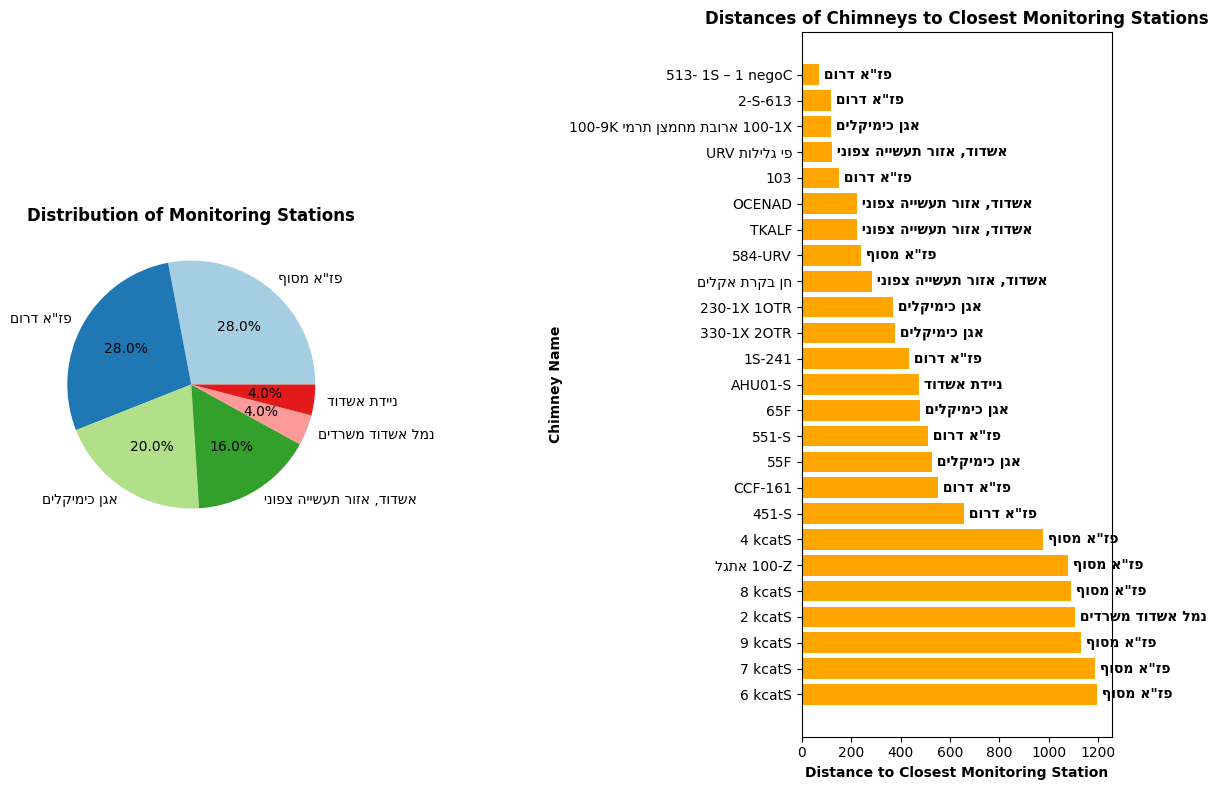

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Pie Chart
station_counts = reversed_df1['תחנת ניטור קרובה ביותר'].value_counts()
axes[0].pie(station_counts, labels=station_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
axes[0].set_title('Distribution of Monitoring Stations',fontweight='bold')

# Horizontal Bar Plot (sorted by distance)
sorted_reversed_df1 = reversed_df1.sort_values(by='מרחק',ascending=False)
axes[1].barh(sorted_reversed_df1['שם הארובה'], sorted_reversed_df1['מרחק'], color='orange') #barh - horizontal barplot
axes[1].set_ylabel('Chimney Name',fontweight='bold')
axes[1].set_xlabel('Distance to Closest Monitoring Station',fontweight='bold')
axes[1].set_title('Distances of Chimneys to Closest Monitoring Stations',fontweight='bold')
# Annotate with the closest monitoring station names
for index, value in enumerate(sorted_reversed_df1['מרחק']):
    plt.text(value, index, f" {sorted_reversed_df1['תחנת ניטור קרובה ביותר'].iloc[index]}", va='center', fontweight='bold')

plt.tight_layout(w_pad=9)
plt.show()

---

#### *2. For each monitoring station, i will find the nearest chimney*

In [24]:
# Initialize an empty list to store the minimum distance and closest chimney for each monitoring station
distlst2 = []

# Iterate over each row in filtered_monitoring
for _, monitoring_row in filtered_monitoring.iterrows():
    
    # Initialize the minimum distance to a very large number (infinity) for each monitoring station row
    min_distance = float('inf')
    # Initialize the closest chimney to an empty string for each monitoring station row
    closest_chimney = ''

    # Iterate over each row in filtered_chimneys
    for _, chimney_row in filtered_chimneys.iterrows():
        
        # Calculate the distance between the current monitoring station row and the current chimney row
        dist = distance(monitoring_row['X'], monitoring_row['Y'], chimney_row['X'], chimney_row['Y'])
        
        # If the calculated distance is less than the current minimum distance
        if dist < min_distance:
            # Update the minimum distance
            min_distance = dist
            # Update the closest chimney name from filtered_chimneys
            closest_chimney = chimney_row['שם ארובה ב ENVISTA']

    # Append a dictionary with the current monitoring station's name, the closest chimney, and the minimum distance to the list
    distlst2.append({
        'שם תחנת הניטור': monitoring_row['NameH_Envista'], 
        'ארובה קרובה ביותר': closest_chimney, 
        'מרחק': min_distance
    })

# Convert the list of dictionaries to a DataFrame
result2_df = pd.DataFrame(distlst2)


## **Results2**

#### ***DataFrame***

In [28]:
result2_df

,שם תחנת הניטור,ארובה קרובה ביותר,מרחק
0,"אשדוד, אזור תעשיה קלה",X1-001 ארובת מחמצן תרמי K9-001,1204.219249
1,"אשדוד, אזור תעשייה צפוני",פי גלילות VRU,121.004132
2,"אשדוד, פארק לכיש",Stack 2,2770.759102
3,"אשדוד, רובע ט""ו החדשה",X1-001 ארובת מחמצן תרמי K9-001,7552.351952
4,"אשדוד, שדרות ירושלים",X1-001 ארובת מחמצן תרמי K9-001,4857.600333
5,בני דרום,S-10UHA,1608.011194
6,גן דרום,S-10UHA,3302.917650
7,גן יבנה,S-10UHA,5766.973556
8,יבנה,פי גלילות VRU,6503.805425
9,"מ.א. חבל יבנה, קבוצת יבנה מערב",S-10UHA,3336.388766


### ***Plots*** :


##### 1.Horizontal Bar Plot - Represents the DataFrame results
##### 2.Pie Chart - shows the percentage of occurrences for each chimney

In [30]:
reversed_df2 = result2_df.copy()

# Ensure the columns are treated as strings
reversed_df2['שם תחנת הניטור'] = reversed_df2['שם תחנת הניטור'].astype(str)
reversed_df2['ארובה קרובה ביותר'] = reversed_df2['ארובה קרובה ביותר'].astype(str)

# Reverse the Hebrew text in the DataFrame for correct display
reversed_df2['שם תחנת הניטור'] = reversed_df2['שם תחנת הניטור'].apply(lambda x: x[::-1])
reversed_df2['ארובה קרובה ביותר'] = reversed_df2['ארובה קרובה ביותר'].apply(lambda x: x[::-1])

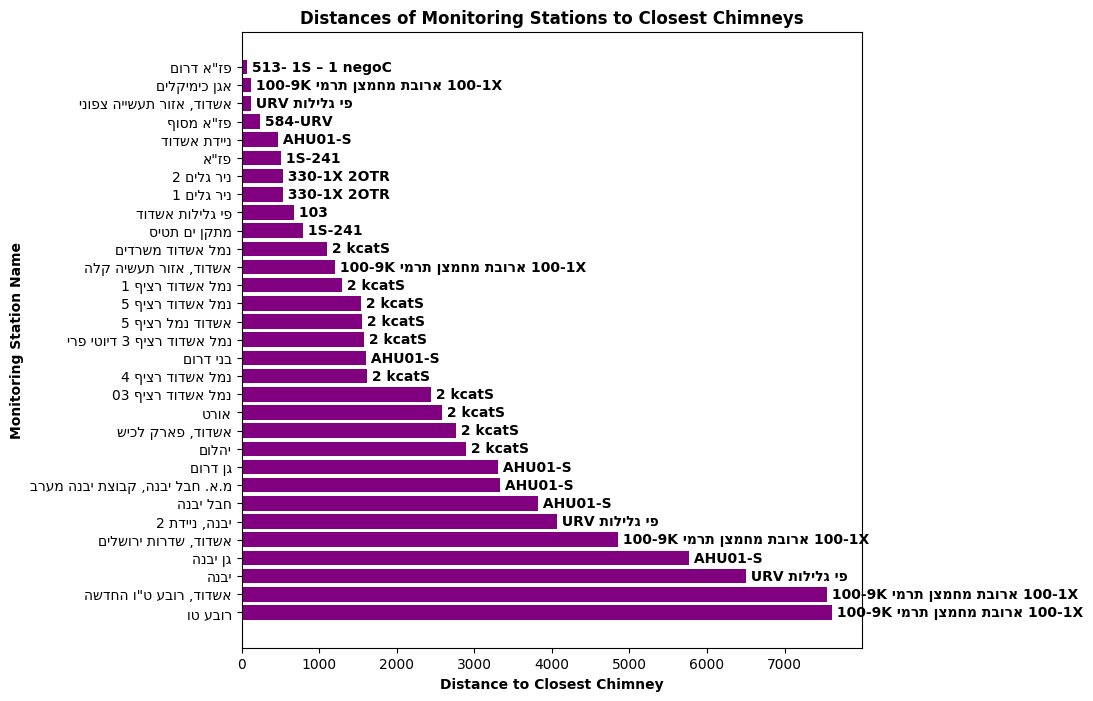

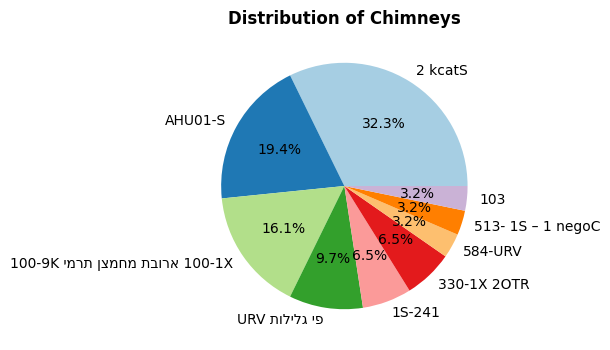

In [31]:
# Horizontal Bar Plot (sorted by distance)
plt.figure(figsize=(8, 8))
sorted_reversed_df2 = reversed_df2.sort_values(by='מרחק', ascending=False)
plt.barh(sorted_reversed_df2['שם תחנת הניטור'], sorted_reversed_df2['מרחק'], color='purple')
plt.ylabel('Monitoring Station Name', fontweight='bold')
plt.xlabel('Distance to Closest Chimney', fontweight='bold')
plt.title('Distances of Monitoring Stations to Closest Chimneys', fontweight='bold')

# Annotate with the closest monitoring station names
for index, value in enumerate(sorted_reversed_df2['מרחק']):
    plt.text(value, index, f" {sorted_reversed_df2['ארובה קרובה ביותר'].iloc[index]}", va='center', fontweight='bold')

# Pie Chart
plt.figure(figsize=(4, 4))
station_counts = reversed_df2['ארובה קרובה ביותר'].value_counts()
plt.pie(station_counts, labels=station_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Distribution of Chimneys', fontweight='bold')


plt.show()